In [7]:
#libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
titanic_data = pd.read_csv("Titanic_dataset.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Değişken Tanımı
* PassengerId => Yolcu numarası (unique id number to each passenger=her yolcu için benzersiz kimlik numarası)
* Survived => Yolcu hayatta mı ? (0 = Vefat eden, 1 = Hayatta kalmış) survive(1) or died(0)
* Pclass => Yolcu sınıfları = passenger class
* Name => Yolcunun adı = name
* Sex => Yolcunun cinsiyeti = gender of passenger
* Age => Yolcunun yaşı = age of passenger
* SibSp => Yolcunun gemide bulunan kardeşleri yada eşleri = number of siblings/spouses
* Parch => Yolcunun gemide bulunan anne, babası yada çocukları = number of parents/children
* Ticket => Yolcunun bilet numarası = ticket number
* Fare => Yolcunun bilet fiyatı = amount of money spent on ticket
* Cabin => Yolcunun kabin numarası = cabin category
* Embarked => Yolcunun gemiye bindiği liman = port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [12]:
#verisetinin boyutu
titanic_data.shape

(891, 12)

In [14]:
# Veri türleri ve eksik değerler hakkında bilgi
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
#columns isimlerini görme
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
#Temel istatistiksel bilgiler
titanic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


* İlk olarak eksik verinin değişken bazında yüzdesine bakılır.

* Eksik veri ile baş etme yöntemleri:

  * Silinebilir. (eğer yapısal bozukluk yoksa ve eksik değer yüzdesi çok fazla değilse tavsiye edilmez.
  * Değer ile doldurabilir.
    * 0 ile doldurulabilir.
    * Eğer kategorik ise mod ile yani en çok tekrar eden değer ile doldurulabilir.
    * Eğer numerik değişken çarpık ise medyan ile, değilse ortalama ile doldurulabilir.
    * ML tabanlı doldurma teknikleri ile yapılabilir. (KNN Imputation)

In [21]:
## Eksik verileri kontrol etme
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#veri setinde eksik veri içeren sütunların isimlerini döndürme
titanic_data.columns[titanic_data.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [25]:
## veri kopyalama
titanic_data_1 = titanic_data.copy()
titanic_data_1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#Sütunda eksik verileri görme
titanic_data_1[titanic_data_1["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: xlabel='Embarked', ylabel='Fare'>

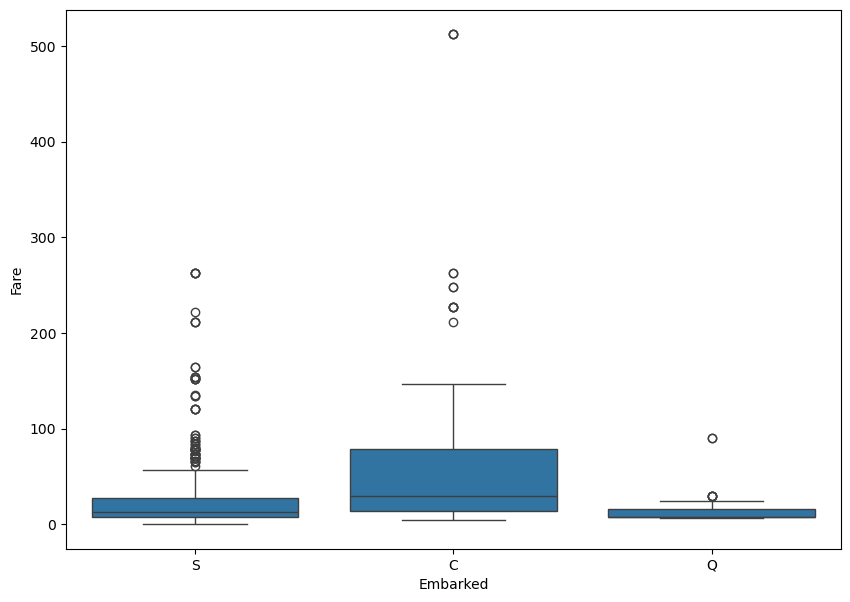

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Embarked", y="Fare", data=titanic_data_1)

<Axes: title={'center': 'Fare'}, xlabel='Embarked'>

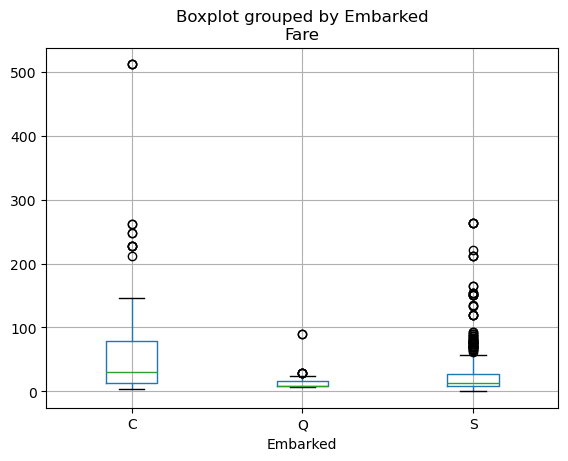

In [31]:
titanic_data_1.boxplot(column="Fare", by="Embarked")

In [33]:
titanic_data_1['Embarked'] = titanic_data_1["Embarked"].fillna("C")

In [35]:
# embarked sütununda boş değer kalmış mı kontrol etme
titanic_data_1[titanic_data_1["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [37]:
# Cabin sütununu çok fazla eksik veri içeriyor
# Cabin sütununu kaldırma 
titanic_data_1 = titanic_data_1.drop(['Cabin'], axis=1)
titanic_data_1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [39]:
titanic_data_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
# eksik yaş verisini ortalama ile doldurma
titanic_data_1[titanic_data_1["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [43]:
titanic_data_1['Age'] = titanic_data_1["Age"].fillna(titanic_data_1["Age"].mean())

In [45]:
titanic_data_1[titanic_data_1["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [47]:
# verisetini kopyalama
df = titanic_data_1.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### 1- Kazada ölenlerin yaş ortalamasını

In [51]:
df[df['Survived'] == 0]['Age'].mean()

30.415099646415943

#### 2- Kazada ölenlerin bilet fiyatlarının ortalamasını ve medyanını

In [55]:
df[df['Survived'] == 0]['Fare'].mean()

22.117886885245902

In [57]:
df[df['Survived'] == 0 ]['Fare'].median()

10.5

#### 3- Kazada ölen erkeklerin yaş ortalamasını bulunuz

In [62]:
df[(df["Survived"] == 0) & (df["Sex"] == "male")]["Age"].mean()

31.175223730517843

#### 4- Kazada ölen kadınların yaş ortalamasını bulunuz

In [65]:
df[(df["Survived"] == 0) & (df["Sex"] == "female")]["Age"].mean()

26.02327160493827

#### 5- Kazadan kurtulanların yaş ortalamasını bulunuz

In [70]:
df[df["Survived"] == 1]["Age"].mean()

28.549778121775027

#### 6- Kazadan kurtulanların bilet fiyatlarının ortalamasını bulunuz

In [75]:
df[df["Survived"] == 1]["Fare"].mean()

48.39540760233918

#### 7- Kazadan kurtulan toplam kişi sayısını bulunuz…

In [78]:
len(df[df["Survived"] == 1])

342

In [80]:
# kazada kurtulanların Satır sayısını verir.
df[df["Survived"] == 1].shape[0]

342

In [82]:
df["Survived"].sum()

342

#### 8- 10 yaşından küçüklerin bilet fiyatlarının medyan değerini bulunuz

In [87]:
df[df["Age"] < 10]["Fare"].median()

27.0

#### 9- 1.sınıf, 2.sınıf ve 3.sınıf bilet fiyatlarının ortalama ve medyanlarını karşılaştırınız.
(Pclass değişkeni sınıfları barındırmaktadır.)

In [90]:
df.groupby("Pclass")["Fare"].agg(["mean", "median"])

,mean,median
Pclass,,
1,84.154687,60.2875
2,20.662183,14.2500
3,13.675550,8.0500


#### 10- Kazada ölen kadınların oranı ile erkeklerin oranını karşılaştırınız. 
##### (Örnek: erkekler için; ölen erkeklerin, erkek sayısına bölümü bu oranı vermektedir.

In [95]:
# Toplam erkek ve kadın sayıları
sum_male = df[df["Sex"] == "male"].shape[0]
sum_female = df[df["Sex"] == "female"].shape[0]

In [97]:
# Ölen erkek ve kadın sayıları
dead_male = df[(df["Sex"] == "male") & (df["Survived"] == 0)].shape[0]
dead_female = df[(df["Sex"] == "female") & (df["Survived"] == 0)].shape[0]

In [101]:
# Oranlar
rate_male = dead_male / sum_male
rate_female = dead_female / sum_female

In [103]:
print(f"Ölen erkek oranı: {rate_male :.2%}")
print(f"Ölen kadın oranı: {rate_female:.2%}")

Ölen erkek oranı: 81.11%
Ölen kadın oranı: 25.80%


In [77]:
#sınıflara göre hayatta kalma ortalamaları 
titanic_data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by="Survived")

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630
